In [86]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
# nltk.download('movie_reviews')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

In [71]:
def get_jane():

    pattern = ("(CHAPTER [IVX]+)\s+" +
                "(.*?)" + "(?=CHAPTER [IVX]+)")

    # group 1 (CHAPTER [IVX]+). CHAPTER means look for "CHAPTER". [IVX] means look for 0 or more letters from I, V, X. Then + if the letter repeats 1 or more times.

    jane = {}

    with open("book.txt", "r") as f:
        text = f.read()
        chapters = re.findall(pattern, text, re.DOTALL)

        num_chap = 0
        for chapter in chapters:
            num_chap += 1
            chap_text = chapter[1]

            chap_text = re.sub("\n", " ", chap_text)

            jane[f"CHAPTER {num_chap}"] = chap_text

    return jane

In [57]:
def moving_average(interval, win_size):
    window = np.ones(int(win_size)) / float(win_size)

    return np.convolve(interval, window, "same")

## Vader Sentiment Intensity Analyser

In [72]:
SIA = SentimentIntensityAnalyzer()

jane = get_jane()

for chapter in jane:
    text = jane[chapter]
    sentence_list = tokenize.sent_tokenize(text)
    sentiments = {"comp": 0.0, "neg": 0.0, "neu": 0.0, "pos": 0.0}

    for sentence in sentence_list:
        vs = SIA.polarity_scores(sentence)
        sentiments["comp"] += vs["compound"]
        sentiments["neg"] += vs["neg"]
        sentiments["neu"] += vs["neu"]
        sentiments["pos"] += vs["pos"]

    sentiments["comp"] = sentiments["comp"] / len(sentence_list)
    sentiments["neg"] = sentiments["neg"] / len(sentence_list)
    sentiments["neu"] = sentiments["neu"] / len(sentence_list)
    sentiments["pos"] = sentiments["pos"] / len(sentence_list)

    jane[chapter] = (jane[chapter], sentiments)

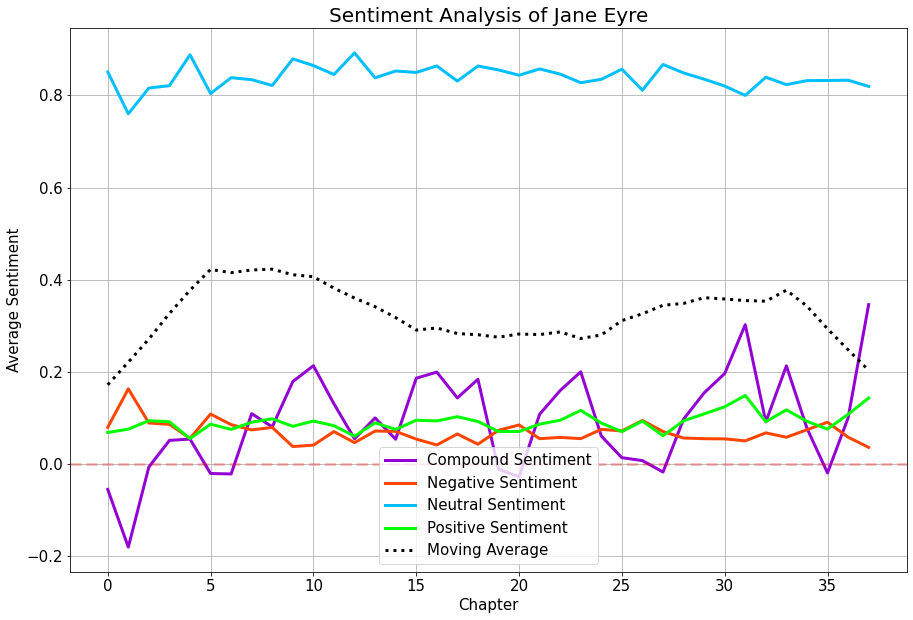

In [73]:
# Plot results

length = len(jane)
x = np.linspace(0, length - 1, num=length)
y_comp = [jane[chapter][1]["comp"] for chapter in jane]
y_neg = [jane[chapter][1]["neg"] for chapter in jane]
y_neu = [jane[chapter][1]["neu"] for chapter in jane]
y_pos = [jane[chapter][1]["pos"] for chapter in jane]

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x, y_comp, color="darkviolet", linewidth="3", label="Compound Sentiment")
ax.plot(x, y_neg, color="orangered", linewidth="3", label="Negative Sentiment")
ax.plot(x, y_neu, color="deepskyblue", linewidth="3", label="Neutral Sentiment")
ax.plot(x, y_pos, color="lime", linewidth="3", label="Positive Sentiment")
ax.plot(moving_average(y, 10), color="k", linewidth="3", linestyle=":", label="Moving Average")

plt.axhline(y=0, xmin=0, xmax=length, alpha=0.25, color="r", linestyle="--", linewidth=3)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

plt.legend(loc="best", fontsize=15)
plt.title("Sentiment Analysis of Jane Eyre", fontsize=20)
plt.xlabel("Chapter", fontsize=15)
plt.ylabel("Average Sentiment", fontsize=15)
plt.grid()
plt.show()

## TextBlob Naive Bayes and Pattern Analysers

In [77]:
NBA = Blobber(analyzer=NaiveBayesAnalyzer())

jane_2 = get_jane()

for chapter in jane_2:
    text = jane_2[chapter]
    sentence_list = tokenize.sent_tokenize(text)

    sentiments_2 = 0

    for sentence in sentence_list:
        sentiments_2 += NBA(sentence).sentiment.p_pos * 2 - 1

    sentiments_2 /= len(sentence_list)

    jane_2[chapter] = (jane_2[chapter], sentiments_2)

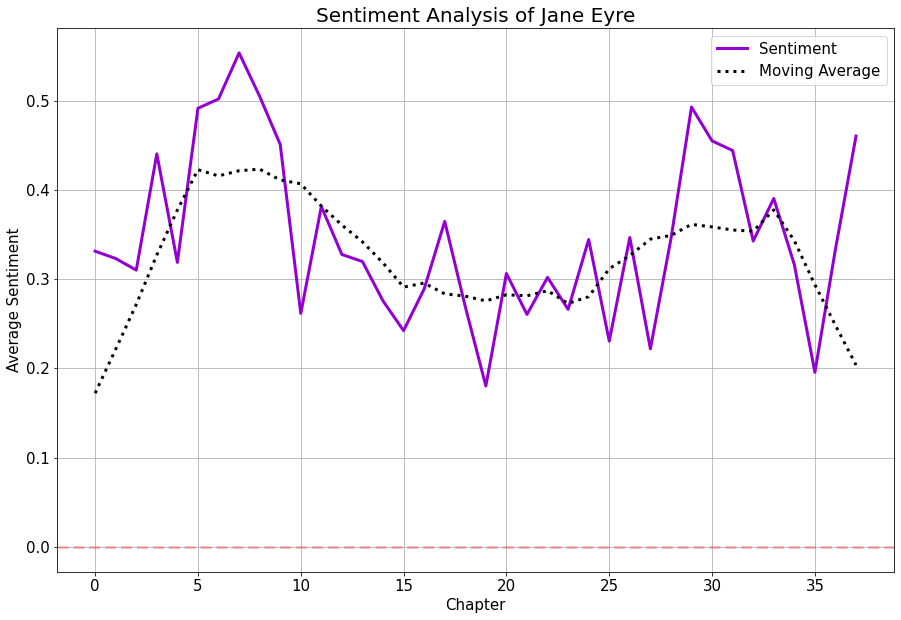

In [79]:
# Plot results

length = len(jane_2)
x = np.linspace(0, length - 1, num=length)
y = [jane_2[chapter][1] for chapter in jane_2]

win_size = (15, 10)
fig, ax = plt.subplots(figsize=win_size)

ax.plot(x, y, color="darkviolet", linewidth="3", label="Sentiment")
ax.plot(moving_average(y, win_size[1]), color="k", linewidth="3", linestyle=":", label="Moving Average")

plt.axhline(y=0, xmin=0, xmax=length, alpha=0.25, color="r", linestyle="--", linewidth=3)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

plt.legend(loc="best", fontsize=15)
plt.title("Sentiment Analysis of Jane Eyre", fontsize=20)
plt.xlabel("Chapter", fontsize=15)
plt.ylabel("Average Sentiment", fontsize=15)
plt.grid()
plt.show()

In [80]:
PA = Blobber(analyzer=PatternAnalyzer())

jane_3 = get_jane()

for chapter in jane_3:
    text = jane_3[chapter]
    sentence_list = tokenize.sent_tokenize(text)

    sentiments_3 = 0

    for sentence in sentence_list:
        sentiments_3 += PA(sentence).sentiment.polarity

    sentiments_3 /= len(sentence_list)

    jane_3[chapter] = (jane_3[chapter], sentiments_3)

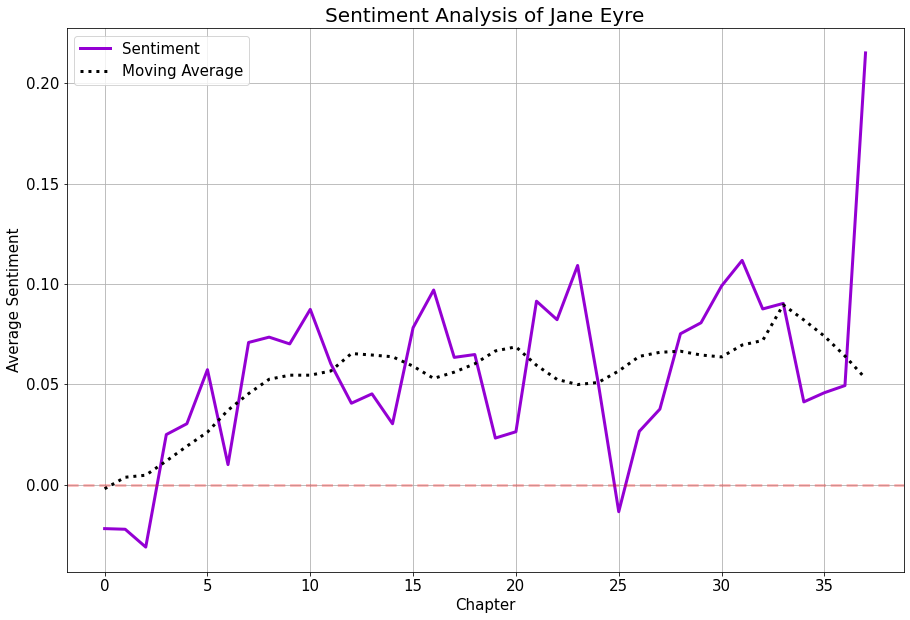

In [81]:
# Plot results

length = len(jane_3)
x = np.linspace(0, length - 1, num=length)
y = [jane_3[chapter][1] for chapter in jane_3]

win_size = (15, 10)
fig, ax = plt.subplots(figsize=win_size)

ax.plot(x, y, color="darkviolet", linewidth="3", label="Sentiment")
ax.plot(moving_average(y, win_size[1]), color="k", linewidth="3", linestyle=":", label="Moving Average")

plt.axhline(y=0, xmin=0, xmax=length, alpha=0.25, color="r", linestyle="--", linewidth=3)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)

plt.legend(loc="best", fontsize=15)
plt.title("Sentiment Analysis of Jane Eyre", fontsize=20)
plt.xlabel("Chapter", fontsize=15)
plt.ylabel("Average Sentiment", fontsize=15)
plt.grid()
plt.show()

## NRC Emotion Lexicon